![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM3 - MI2
# Projet

[![Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jbcaillau/mi2/master?urlpath=lab/tree/proj/proj.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jbcaillau/mi2/blob/master/proj/proj.ipynb)

# Exercice 1A
Soit $f : \mathbf{R}^n \to \mathbf{R}$ définie par $f(x)=\|x\|^2 \cos(\|x\|^2+1)$.

### 1.1
Montrer que $f$ est deux fois dérivable puis donner son gradient et son hessien.

$\rhd$ On sait que les fonctions $g:x\mapsto \|x\|^2$ et $h:x\mapsto x\cos(x+1)$ sont deux fois dérivables, donc $f=h\circ g$ est deux fois dérivable. Par la formule de dérivation des fonctions composées, sachant que $\nabla g(x)=2x$, on a
$$\nabla f(x) = 2(\cos(\|x\|^2+1)-\|x\|^2 \sin(\|x\|^2+1))x,$$
et par une dérivation supplémentaire,
$$\nabla^2 f(x) = 2(\cos(\|x\|^2+1)-\|x\|^2 \sin(\|x\|^2+1))\mathrm{Id} - 4(2\sin(\|x\|^2+1)+\|x\|^2 \cos(\|x\|^2+1))x x^T.$$

### 1.2
Vérifier vos calculs par différences finies pour $n=3$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.ion()

def f(x):
  return (np.linalg.norm(x)**2)*math.cos(1+np.linalg.norm(x)**2)

def gradf(x):
    return 2*(math.cos(1+np.linalg.norm(x)**2)-np.linalg.norm(x)**2*math.sin(1+np.linalg.norm(x)**2))*x

def hessienf(x):
    return 2*(math.cos(1+np.linalg.norm(x)**2)-np.linalg.norm(x)**2*math.sin(1+np.linalg.norm(x)**2))*np.eye(3) - 4*(2*math.sin(1+np.linalg.norm(x)**2)+np.linalg.norm(x)**2*math.cos(1+np.linalg.norm(x)**2))*np.tensordot(x,x,axes=0)

def gradDF(f,x,h):
    n=np.size(x)
    grad=np.zeros(n)
    for i in range(n):
        e=np.zeros(n)
        e[i] = 1
        grad[i]=(f(x+h*e)-f(x))/h
    return grad

def hessienDF(f,x,h):
    n=np.size(x)
    hessien=np.zeros((n,n))
    for i in range(n):
        e=np.zeros(n)
        e[i]=1
        for j in range(n):
            b=np.zeros(n)
            b[j]=1
            hessien[j,i]=(f(x+(h*b)+(h*e))-f(x+(h*e))-f(x+(h*b))+f(x))/h**2
    return hessien

x = np.array([1,2,3])
h = 0.000001
grad = gradf(x)
err_grad = grad - gradDF(f,x,h)
hessien = hessienf(x)
err_hessien = hessien - hessienDF(f,x,h)
print("Valeur du gradient de f : ",grad)
print("Erreur sur le gradient de f : ",err_grad)
print("Valeur du hessien de f :",hessien)
print("Erreur sur le hessien de f :",err_hessien)

Valeur du gradient de f :  [-19.72743535 -39.4548707  -59.18230605]
Erreur sur le gradient de f :  [-8.82044706e-06 -6.48102736e-05 -1.58158661e-04]
Valeur du hessien de f : [[ 17.61278505  74.6804408  112.0206612 ]
 [ 74.6804408  129.63344625 224.04132239]
 [112.0206612  224.04132239 316.33454824]]
Erreur sur le hessien de f : [[ 1.97469113e-02  1.66101240e-02  4.61902526e-05]
 [ 1.66101240e-02 -1.57340352e-02 -1.68397633e-03]
 [ 4.61902526e-05 -1.68397633e-03 -8.54077819e-04]]


## Exercice 1B
Soit $f : \mathbf{R}^n \to \mathbf{R}$ définie par $f(x)=(\|x\|^2+1) \sin(\|x\|^2)$.

### 1.1
Montrer que $f$ est deux fois dérivable puis donner son gradient et son hessien.

$\rhd$ On sait que les fonctions $g:x\mapsto \|x\|^2$ et $h:x\mapsto (x+1)\sin(x)$ sont deux fois dérivables, donc $f=h\circ g$ est deux fois dérivable. Par la formule de dérivation des fonctions composées, sachant que $\nabla g(x)=2x$, on a
$$\nabla f(x) = 2((\|x\|^2+1)\cos(\|x\|^2)+\sin(\|x\|^2))x,$$
et par une dérivation supplémentaire,
$$\nabla^2 f(x) = 2((\|x\|^2+1)\cos(\|x\|^2)+\sin(\|x\|^2))\mathrm{Id} + 4(-(\|x\|^2+1)\sin(\|x\|^2)+2 \cos(\|x\|^2))x x^T.$$

### 1.2
Vérifier vos calculs par différences finies pour $n=3$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.ion()

def f(x):
  return (np.linalg.norm(x)**2+1)*math.sin(np.linalg.norm(x)**2)

def gradf(x):
    return 2*((np.linalg.norm(x)**2+1)*math.cos(np.linalg.norm(x)**2)+math.sin(np.linalg.norm(x)**2))*x

def hessienf(x):
    return 2*((np.linalg.norm(x)**2+1)*math.cos(np.linalg.norm(x)**2)+math.sin(np.linalg.norm(x)**2))*np.eye(3) + 4*(-(1+np.linalg.norm(x)**2)*math.sin(np.linalg.norm(x)**2)+2*math.cos(np.linalg.norm(x)**2))*np.tensordot(x,x,axes=0)

def gradDF(f,x,h):
    n=np.size(x)
    grad=np.zeros(n)
    for i in range(n):
        e=np.zeros(n)
        e[i] = 1
        grad[i]=(f(x+h*e)-f(x))/h
    return grad

def hessienDF(f,x,h):
    n=np.size(x)
    hessien=np.zeros((n,n))
    for i in range(n):
        e=np.zeros(n)
        e[i]=1
        for j in range(n):
            b=np.zeros(n)
            b[j]=1
            hessien[j,i]=(f(x+(h*b)+(h*e))-f(x+(h*e))-f(x+(h*b))+f(x))/h**2
    return hessien

x = np.array([1,2,3])
h = 0.00001
grad = gradf(x)
err_grad = grad - gradDF(f,x,h)
hessien = hessienf(x)
err_hessien = hessien - hessienDF(f,x,h)
print("Valeur du gradient de f : ",grad)
print("Erreur sur le gradient de f : ",err_grad)
print("Valeur du hessien de f :",hessien)
print("Erreur sur le hessien de f :",err_hessien)

Valeur du gradient de f :  [ 6.08333126 12.16666252 18.24999377]
Erreur sur le gradient de f :  [0.0002613  0.00113644 0.00259502]
Valeur du hessien de f : [[ -52.25921234 -116.68508719 -175.02763079]
 [-116.68508719 -227.28684313 -350.05526158]
 [-175.02763079 -350.05526158 -518.99956111]]
Erreur sur le hessien de f : [[0.00212958 0.00210605 0.00350546]
 [0.00210605 0.00680744 0.0075616 ]
 [0.00350546 0.0075616  0.01602496]]


## Exercice 1C
Soit $f : \mathbf{R}^n \to \mathbf{R}$ définie par $f(x)=(\|x\|^2-1)\ln(1+\|x\|^2)$.

### 1.1
Montrer que $f$ est deux fois dérivable puis donner son gradient et son hessien.

$\rhd$ On sait que les fonctions $g:x\mapsto \|x\|^2$ et $h:x\mapsto (x-1)\ln(x+1)$ sont deux fois dérivables, donc $f=h\circ g$ est deux fois dérivable. Par la formule de dérivation des fonctions composées, sachant que $\nabla g(x)=2x$, on a
$$\nabla f(x) = 2(\ln(1+\|x\|^2)+\frac{\|x\|^2-1}{1+\|x\|^2})x,$$
et par une dérivation supplémentaire,
$$\nabla^2 f(x) = 2(\ln(1+\|x\|^2)+\frac{\|x\|^2-1}{1+\|x\|^2})\mathrm{Id} + 4(\frac{3+\|x\|^2}{(1+\|x\|^2)^2})x x^T.$$

### 1.2
Vérifier vos calculs par différences finies pour $n=3$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.ion()

def f(x):
  return (np.linalg.norm(x)**2-1)*math.log(1+np.linalg.norm(x)**2)

def gradf(x):
    return 2*(math.log(1+np.linalg.norm(x)**2)+(np.linalg.norm(x)**2-1)/(np.linalg.norm(x)**2+1))*x

def hessienf(x):
    return 2*(math.log(1+np.linalg.norm(x)**2)+(np.linalg.norm(x)**2-1)/(np.linalg.norm(x)**2+1))*np.eye(3) + 4*(3+np.linalg.norm(x)**2)/(1+np.linalg.norm(x)**2)**2*np.tensordot(x,x,axes=0)

def gradDF(f,x,h):
    n=np.size(x)
    grad=np.zeros(n)
    for i in range(n):
        e=np.zeros(n)
        e[i] = 1
        grad[i]=(f(x+h*e)-f(x))/h
    return grad

def hessienDF(f,x,h):
    n=np.size(x)
    hessien=np.zeros((n,n))
    for i in range(n):
        e=np.zeros(n)
        e[i]=1
        for j in range(n):
            b=np.zeros(n)
            b[j]=1
            hessien[j,i]=(f(x+(h*b)+(h*e))-f(x+(h*e))-f(x+(h*b))+f(x))/h**2
    return hessien

x = np.array([1,2,3])
h = 0.00001
grad = gradf(x)
err_grad = grad - gradDF(f,x,h)
hessien = hessienf(x)
err_hessien = hessien - hessienDF(f,x,h)
print("Valeur du gradient de f : ",grad)
print("Erreur sur le gradient de f : ",err_grad)
print("Valeur du hessien de f :",hessien)
print("Erreur sur le hessien de f :",err_hessien)

Valeur du gradient de f :  [ 7.14943374 14.29886747 21.44830121]
Erreur sur le gradient de f :  [-3.72580016e-05 -4.17926680e-05 -4.93471411e-05]
Valeur du hessien de f : [[7.45165596 0.60444444 0.90666667]
 [0.60444444 8.35832262 1.81333333]
 [0.90666667 1.81333333 9.86943374]]
Erreur sur le hessien de f : [[-1.88749769e-05  5.67934069e-05 -5.69184368e-05]
 [ 5.67934069e-05  1.37369407e-04  9.93259471e-05]
 [-5.69184368e-05  9.93259471e-05 -7.59184436e-05]]


## Exercice 2
On considère l'ensemble $E$ des fonctions bornées de $[0,1]$ dans $\mathbf{R}$. On muni cet ensemble de la norme
$$ \|x\|_\infty = \sup_{t \in [0,1]} |x(t)|. $$

### 2.1
Donner un exemple de fonction dans $E$ telle que, pour tout $t \in [0,1]$, $|x(t)| < \|x\|_\infty$.

$\rhd$ La fonction définie par $x(t)=t$ si $t \in [0,1[$, $x(1)=0$, convient : le $\sup$ de sa valeur absolue vaut clairement $1$ mais cette valeur n'est atteinte en aucun $t$ dans $[0,1]$. L'exemple doit être une fonction discontinue, puisqu'une fonction continue sur $[0,1]$, compact (_i.e._ fermé borné), atteint nécessairement ses bornes. (Si $x$ est continue, $|x|$ également et le $\sup$, atteint, est un $\max$.) 

### 2.2
Montrer que $(E,\|\cdot\|_\infty)$ est un espace de Banach.

$\rhd$ On remarque tout d'abord que $E$ un espace vectoriel comme sev de l'espace vectoriel des fonctions de $[0,1]$ dans $\mathbf{R}$ (dont la structure d'ev est directement héritée de celle de $\mathbf{R}$---propriété de "transfert"---avec les définition usuelles de somme et produit par un scalaire pour les fonctions) puisque, si $x$ et $y$ sont deux applications bornées et $\lambda$ un scalaire, clairement
$$ |\lambda x(t)+y(t)| \leq |\lambda|\|x\|_\infty + \|y\|_\infty $$
pour tout $t$ dans $[0,1]$, d'uù le caractère borné de $\lambda x+y$. Il est immédiat de vérifier que $\|\cdot\|_\infty$ définit une norme sur cet ev.

Pour la complétude, on procède selon les trois étapes habituelles, exactement comme à l'Exercice 3 du [TD 3](https://github.com/jbcaillau/mi2/blob/master/td3/td3.ipynb).

**i) Construction du candidat à être limite.** Soit $(x_n)_n$ une suite de Cauchy de fonctions bornées :
$$ (\forall \varepsilon)(\exists N \in \mathbf{N})(\forall p,q \geq N) : \|x_p-x_q\|_\infty \leq \varepsilon. $$
En particulier, pour tout $t \in [0,1]$, $|x_p(t)-x_q(t)| \leq \varepsilon$, de sorte que (et c'est beaucoup plus faible) on a que chaque suite $(x_n(t))_n$ est de Cauchy dans $(\mathbf{R},|\cdot|)$, complet. Pour tout $t \in [0,1]$, il existe donc une limite de la suite $(x_n(t))_n$ : notons $x(t)$ cette limite, définissant ainsi une application (la limite, lorsqu'elle existe, est unique) de $[0,1]$ dans $\mathbf{R}$. 

**ii) Appartenance de la limite à l'espace considéré.** Reprenant la propriété
$$ (\forall \varepsilon)(\exists N \in \mathbf{N})(\forall p,q \geq N)(\forall t \in [0,1]) : |x_p(t)-x_q(t)| \leq \varepsilon $$
et passant à la limite sur $q$ ($q \to \infty$, puisque la suite $x_q(t)$ converge), on a
$$ (\forall \varepsilon)(\exists N \in \mathbf{N})(\forall p \geq N)(\forall t \in [0,1]) : |x_p(t)-x(t)| \leq \varepsilon. $$
Pour $\varepsilon=1$, notamment, il existe $N_1$ tel que
$$ (\forall t \in [0,1]) : |x_{N_1}(t)-x(t)|_\infty \leq 1, $$
ce qui montre que $x_{N_1}-x$, donc que $x=x_{N_1}-(x_{N_1}-x)$, est une application bornée.

**iii) Convergence.** Il suffit de constater que la propriété précédente se réécrit
$$ (\forall \varepsilon)(\exists N \in \mathbf{N})(\forall p \geq N) : \|x_p-x\|_\infty \leq \varepsilon. $$

### 2.3
Montrer que l'ensemble $\mathscr{C}^0([0,1],\mathbf{R})$ des fonctions continues de $[0,1]$ dans $\mathbf{R}$ est un sous-espace vectoriel fermé de $E$.

$\rhd$ Une application continue sur un compact étant bornée, $\mathscr{C}^0([0,1],\mathbf{R})$ est un bien un sev de $E$. Soit alors $(x_n)_n$ une suite d'applications continues qui converge dans $(E,\|\cdot\|_\infty)$ vers une application bornée $x$. Il suffit de montrer $x$ est continue pour conclure que le sev est fermé. Soit donc $t \in [0,1]$, et soit $\varepsilon>0$ ; par convergence, il existe $n$ tel que $\|x-x_n\|_\infty \leq \varepsilon/3$ et, comme $x_n$ est continue, il existe aussi $\eta>0$ tel que $|t-s| \leq \eta$ implique $|x_n(t)-x_n(s)| \leq \varepsilon/3$. Au final,
$$ |x(t)-x(s)| \leq |x(t)-x_n(t)|+|x_n(t)-x_n(s)|+|x_n(s)-x(s)| \leq \varepsilon. $$

## Exercice 3A

### 3.1
Résoudre le problème d'optimisation
$$ \int_0^1 |t-\sum_{k=0}^n a_k e^{kt}|^2\,\mathrm{d}t \to \min $$
$$ (a_0,\dots,a_n) \in \mathbf{R}^{n+1} $$
pour $n=1$ et $n=2$.

$\rhd$ Le problème revient à trouver la projection orthogonale dans $L^2([0,1],\mathbf{R})$ de $t\mapsto t$ sur l'espace vectoriel engendré par les $(e^{kt})_{0\leq k\leq n}$ avec $n=1$ ou $n=2$.
##### Dans le cas $n=1$:
Par propriété de la projection orthogonale,
\begin{align}
(1|1)a_0 + (1|e^t)a_1 &= (1|t) \\
(e^t|1)a_0 + (e^t|e^t)a_1 &= (e^t|t).
\end{align}
On calcule les différents coefficients:

$(1|1) = \int_0^1 1dt = 1$.
$(1|e^t) = (e^t|1) = \int_0^1 e^tdt = e-1$.
$(e^t|e^t) = \int_0^1 e^{2t}dt = \frac{e^2-1}{2}$.
$(1|t) = \int_0^1 tdt = \frac{1}{2}$.
$(e^t|t) = \int_0^1 te^t dt = [(t-1)e^t]_0^1 = 1$.

Finalement,
\begin{align}
a_0 + (e-1)a_1 &= \frac{1}{2} \\
(e-1)a_0 + \frac{e^2-1}{2}a_1 &= 1.
\end{align}
La résolution du système donne :
\begin{align}
a_0 &= -\frac{1}{2}\\
a_1 &= \frac{1}{e-1}.
\end{align}
##### Dans le cas $n=2$:
\begin{align}
(1|1)a_0 + (1|e^t)a_1 + (1|e^{2t})a_2 &= (1|t) \\
(e^t|1)a_0 + (e^t|e^t)a_1 + (e^t|e^{2t})a_2 &= (e^t|t)\\
(e^{2t}|1)a_0 + (e^{2t}|e^t)a_1 + (e^{2t}|e^{2t})a_2 &= (e^{2t}|t).
\end{align}
On calcule les différents coefficients:

$(1|e^{2t}) = (e^{2t}|1) = (e^t|e^t) = \frac{e^2-1}{2}$.
$(e^t|e^{2t}) = (e^{2t}|e^t) = \int_0^1 e^{3t}dt = \frac{e^3-1}{3}$
$(e^{2t}|e^{2t}) = \int_0^1 e^{4t}dt = \frac{e^4-1}{4}$
$(e^{2t}|t) = \int_0^1 te^{2t} dt = [\frac{2t-1}{4}e^{2t}]_0^1 = \frac{e^2+1}{4}$.

Finalement,
\begin{align}
a_0 + (e-1)a_1 + \frac{e^2-1}{2}a_2 &= \frac{1}{2} \\
(e-1)a_0 + \frac{e^2-1}{2}a_1 + \frac{e^3-1}{3}a_2 &= 1\\
\frac{e^2-1}{2}a_0 + \frac{e^3-1}{3}a_1 + \frac{e^4-1}{4}a_2 &= \frac{e^2+1}{4}.
\end{align}
La résolution du système donne :
\begin{align}
a_0 &= -1\\
a_1 &= \frac{6}{(e-1)^3}\\
a_2 &= \frac{3(e-3)}{(e-1)^3}.
\end{align}

### 3.2
Représenter graphiquement les approximations de la fonction $t \to t$, $t \in [0,1]$, ainsi obtenues.

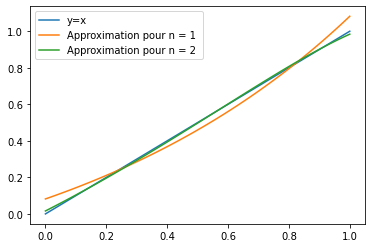

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.ion()

N = 100
i=np.linspace(0,1,N+1)
def f(t):
  return t

def f1(t,a,b):
  return a+b*math.exp(t)

def f2(t,a,b,c):
  return a+b*math.exp(t)+c*math.exp(2*t)

S0=[]
t=0
for k in range(N+1):
    t = k/N
    s = f(t)
    S0.append(s)
plt.plot(i,S0,label="y=x")
plt.legend()

a=-0.5
b= 0.58198
S1 = []
t = 0
for k in range(N+1):
    t = k/N
    s = f1(t,a,b)
    S1.append(s)
plt.plot(i,S1,label="Approximation pour n = 1 ")
plt.legend()

a = -1.0
b = 1.1827
c = -0.16659
S2 = []
t = 0
for k in range(N+1):
    t = k/N
    s = f2(t,a,b,c)
    S2.append(s)
plt.plot(i,S2,label="Approximation pour n = 2 ")
plt.legend()

## Exercice 3B

### 3.1
Résoudre le problème d'optimisation
$$ \int_0^1 |t-\sum_{k=0}^n a_k \cos(kt)|^2\,\mathrm{d}t \to \min $$
$$ (a_0,\dots,a_n) \in \mathbf{R}^{n+1} $$
pour $n=1$ et $n=2$.

$\rhd$ Le problème revient à trouver la projection orthogonale dans $L^2([0,1],\mathbf{R})$ de $t\mapsto t$ sur l'espace vectoriel engendré par les $(\cos(kt))_{0\leq k\leq n}$ avec $n=1$ ou $n=2$.
##### Dans le cas $n=1$:
\begin{align}
(1|1)a_0 + (1|\cos t)a_1 &= (1|t) \\
(\cos t|1)a_0 + (\cos t|\cos t)a_1 &= (\cos t|t).
\end{align}
On calcule les différents coefficients:

$(1|1) = \int_0^1 1dt = 1$.
$(1|\cos t) = (\cos t|1) = \int_0^1 \cos tdt = \sin(1)$.
$(\cos t|\cos t) = \int_0^1 \cos^2 tdt = \frac{\sin(2)+2}{4}$.
$(1|t) = \int_0^1 tdt = \frac{1}{2}$.
$(\cos t|t) = \int_0^1 t\cos t dt = [t\sin t+\cos t]_0^1 = \sin(1)+\cos(1)-1$.

Finalement,
\begin{align}
a_0 + \sin(1)a_1 &= \frac{1}{2} \\
\sin(1)a_0 + \frac{\sin(2)+2}{4}a_1 &= \sin(1)+\cos(1)-1.
\end{align}
La résolution du système donne:
\begin{align}
a_0 &= \frac{4\sin^2(1)+(3\cos(1)-4)\sin(1)-1}{4\sin^2(1)-2\cos(1)\sin(1)-2}\\
a_1 &= \frac{2-\sin(1)-2\cos(1)}{2\sin^2(1)-\cos(1)\sin(1)-1}
\end{align}
##### Dans le cas $n=2$:
\begin{align}
(1|1)a_0 + (1|\cos t)a_1 + (1|\cos(2t))a_2 &= (1|t) \\
(\cos t|1)a_0 + (\cos t|\cos t)a_1 + (\cos t|\cos (2t))a_2 &= (\cos t|t)\\
(\cos(2t)|1)a_0 + (\cos(2t)|\cos t)a_1 + (\cos(2t)|\cos(2t))a_2 &= (\cos(2t)|t).
\end{align}
On calcule les différents coefficients:

$(1|\cos(2t)) = (\cos(2t)|1) = \int_0^1\cos(2t)dt = \frac{\sin(2)}{2}$
$(\cos t|\cos (2t)) = (\cos (2t)|\cos t) = \int_0^1 \cos(2t)\cos(t)dt = \int_0^1 \frac{1}{2}(\cos(3t)+\cos t)dt = \frac{\sin(3)}{6}+\frac{\sin(1)}{2}$
$(\cos(2t)|\cos(2t)) = \int_0^1 \cos^2(2t)dt = \int_0^1\frac{\cos(4t)+1}{2}dt = \frac{\sin(4)}{8}+\frac{1}{2}$
$(\cos(2t)|t) = \int_0^1 t\cos(2t)dt = [\frac{t}{2}\sin(2t)+\frac{1}{4}\cos(2t)]_0^1 = \frac{\sin(2)}{2}+\frac{\cos(2)-1}{4}$

Finalement, 
\begin{align}
a_0 + \sin(1)a_1 + \frac{\sin(2)}{2}a_2 &= \frac{1}{2} \\
\sin(1)a_0 + \frac{\sin(2)+2}{4}a_1 + \frac{\sin(3)+3\sin(1)}{6}a_2 &= \sin(1)+\cos(1)-1\\
\frac{\sin(2)}{2}a_0 + \frac{\sin(3)+3\sin(1)}{6}a_1 + \frac{\sin(4)+4}{8}a_2 &= \frac{\sin(2)}{2}+\frac{\cos(2)-1}{4}.
\end{align}
La résolution du système donne la solution approchée:
\begin{align}
a_0 &\approx -1.759\\
a_1 &\approx 3.64\\
a_2 &\approx -1.7677
\end{align}

### 3.2
Représenter graphiquement les approximations de la fonction $t \to t$, $t \in [0,1]$, ainsi obtenues.

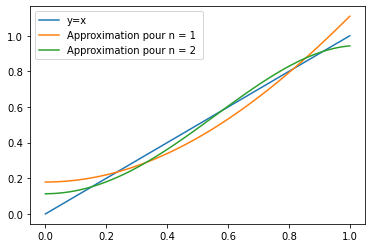

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.ion()

N = 100
i=np.linspace(0,1,N+1)
def f(t):
  return t

def f1(t,a,b):
  return a+b*math.cos(t)

def f2(t,a,b,c):
  return a+b*math.cos(t)+c*math.cos(2*t)

S0=[]
t=0
for k in range(N+1):
    t = k/N
    s = f(t)
    S0.append(s)
plt.plot(i,S0,label="y=x")
plt.legend()

a=2.203063067
b= -2.023911814
S1 = []
t = 0
for k in range(N+1):
    t = k/N
    s = f1(t,a,b)
    S1.append(s)
plt.plot(i,S1,label="Approximation pour n = 1 ")
plt.legend()

a = -1.759
b = 3.64
c = -1.7677
S2 = []
t = 0
for k in range(N+1):
    t = k/N
    s = f2(t,a,b,c)
    S2.append(s)
plt.plot(i,S2,label="Approximation pour n = 2 ")
plt.legend()

## Exercice 3C

### 3.1
Résoudre le problème d'optimisation
$$ \int_0^1 |t-\sum_{k=0}^n a_k \sin^k t|^2\,\mathrm{d}t \to \min $$
$$ (a_0,\dots,a_n) \in \mathbf{R}^{n+1} $$
pour $n=1$ et $n=2$.

$\rhd$ Le problème revient à trouver la projection orthogonale dans $L^2([0,1],\mathbf{R})$ de $t\mapsto t$ sur l'espace vectoriel engendré par les $(\sin^k t)_{0\leq k\leq n}$ avec $n=1$ ou $n=2$.
##### Dans le cas $n=1$:
\begin{align}
(1|1)a_0 + (1|\sin t)a_1 &= (1|t) \\
(\sin t|1)a_0 + (\sin t|\sin t)a_1 &= (\sin t|t).
\end{align}
On calcule les différents coefficients:

$(1|1) = \int_0^1 1dt = 1$.
$(1|\sin t) = (\sin t|1) = \int_0^1 \sin tdt = 1-\cos(1)$.
$(\sin t|\sin t) = \int_0^1 \sin^2 tdt = \frac{2-\sin(2)}{4}$.
$(1|t) = \int_0^1 tdt = \frac{1}{2}$.
$(\sin t|t) = \int_0^1 t\sin t dt = [-t\cos t+\sin t]_0^1 = \sin(1)-\cos(1)$.

Finalement,
\begin{align}
a_0 + (1-\cos(1))a_1 &= \frac{1}{2} \\
(1-\cos(1))a_0 + \frac{2-\sin(2)}{4}a_1 &= \sin(1)-\cos(1).
\end{align}
La résolution du système donne:
\begin{align}
a_0 &\approx -0.03437 \\
a_1 &\approx 1.16244 
\end{align}
##### Dans le cas $n=1$:
\begin{align}
(1|1)a_0 + (1|\sin t)a_1 + (1|\sin^2 t)a_2 &= (1|t) \\
(\sin t|1)a_0 + (\sin t|\sin t)a_1 + (\sin t|\sin^2 t)a_2 &= (\sin t|t)\\
(\sin^2 t|1)a_0 + (\sin^2 t|\sin t)a_1 + (\sin^2 t|\sin^2 t)a_2 &= (\sin^2 t|t)
\end{align}
On calcule les différents coefficients:

$(1|\sin^2 t) = (\sin^2 t|1) = (\sin t|\sin t) = \frac{2-\sin(2)}{4}$
$(\sin t|\sin^2 t) = (\sin^2 t|\sin t) = \int_0^1\sin^3 tdt = -\frac{3}{4}(\cos(1)-1)+\frac{1}{12}(\cos(3)-1) = \frac{\cos(3)-9\cos(1)+8}{12}$
$(\sin^2 t|\sin^2 t) = \int_0^1 \sin^4(t) dt = \frac{\sin(4)-8\sin(2)+12}{32}$
$(\sin^2 t|t) = \int_0^1 t\sin^2 t dt = \frac{3-2\sin(2)-\cos(2)}{8}$

Finalement,
\begin{align}
a_0 + (1-\cos(1))a_1 + \frac{2-\sin(2)}{4}a_2 &= \frac{1}{2} \\
(1-\cos(1))a_0 + \frac{2-\sin(2)}{4}a_1 + \frac{\cos(3)-9\cos(1)+8}{12}a_2 &= \sin(1)-\cos(1)\\
\frac{2-\sin(2)}{4}a_0 + \frac{\cos(3)-9\cos(1)+8}{12}a_1 + \frac{\sin(4)-8\sin(2)+12}{32}a_2 &= \frac{3-2\sin(2)-\cos(2)}{8}.
\end{align}
La résolution du système donne:
\begin{align}
a_0 &\approx 0.013312 \\
a_1 &\approx  0.83924 \\
a_2 &\approx 0.37
\end{align}

### 3.2
Représenter graphiquement les approximations de la fonction $t \to t$, $t \in [0,1]$, ainsi obtenues.

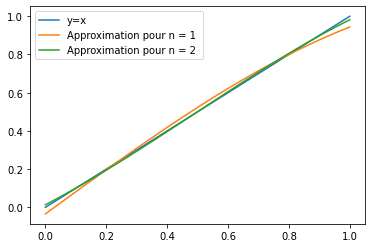

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.ion()

N = 100
i=np.linspace(0,1,N+1)
def f(t):
  return t

def f1(t,a,b):
  return a+b*math.sin(t)

def f2(t,a,b,c):
  return a+b*math.sin(t)+c*math.sin(t)**2

S0=[]
t=0
for k in range(N+1):
    t = k/N
    s = f(t)
    S0.append(s)
plt.plot(i,S0,label="y=x")
plt.legend()

a= -0.03437
b= 1.16244
S1 = []
t = 0
for k in range(N+1):
    t = k/N
    s = f1(t,a,b)
    S1.append(s)
plt.plot(i,S1,label="Approximation pour n = 1 ")
plt.legend()

a = 0.013312
b = 0.83924
c = 0.37
S2 = []
t = 0
for k in range(N+1):
    t = k/N
    s = f2(t,a,b,c)
    S2.append(s)
plt.plot(i,S2,label="Approximation pour n = 2 ")
plt.legend()

## Exercice 4A
Soit $f \in \mathbf{R}^\mathbf{R}$ définie par $f(t)=|t|$ sur $[-\pi,\pi[$ et prolongée par $2\pi$-périodicité.

### 4.1
Donner l'expression de la série de Fourier de $f$
sur la base hilbertienne des polynômes trigonométriques.

### 4.2
En déduire
$$ \sum_{p \geq 0} \frac{1}{(2p+1)^4}\cdot $$

### 4.3
Peut-on utiliser le théorème de Dirichlet pour déduire l'expression d'une autre série ?

### 4.4
Vérifier numériquement la convergence de la série de la question 4.2.

In [7]:
# à compléter...

## Exercice 4B
Soit $f \in \mathbf{R}^\mathbf{R}$ définie par $f(t)=t^3$ sur $[-\pi,\pi[$ et prolongée par $2\pi$-périodicité.

### 4.1
Donner l'expression de la série de Fourier de $f$
sur la base hilbertienne des polynômes trigonométriques.

### 4.2
En déduire $\zeta(6)$.

### 4.3
Peut-on utiliser le théorème de Dirichlet pour déduire l'expression d'une autre série ?

### 4.4
Vérifier numériquement la convergence de la série de la question 4.2.

In [8]:
# à compléter...

## Exercice 5A
On cherche les distributions $S$ dans $\mathscr{D}'(\mathbf{R})$ qui vérifient
$$ xS' = T_{\sin} \tag{1} $$
où $T_{\sin}$ désigne la distribution régulière associée à la fonction sinus.

### 5.1
Montrer que la fonction $f:\mathbf{R} \to \mathbf{R}$ définie par $f(x)=(1/x)\sin x$ si $x \neq 0$, $f(0)=1$ est localement intégrable, et calculer $xT_f$.

#### Correction
Puisque $\lim_{x\to 0}\frac{\sin x}{x} = 1$, la fonction $f$ est continue sur $\mathbf{R}$. La fonction $f$ est donc localement intégrable. Si on prend $T_f$ la distribution régulière associée, pour tout $\varphi\in\mathcal{D}(\mathbf{R})$, puisque $x\mapsto x$ est de classe $C^\infty$,
\begin{align}
\langle xT_f,\varphi\rangle &= \langle T_f,x\varphi\rangle = \int_{\mathbf{R}}f(x)x\varphi(x)dx = \int_{\mathbf{R}}\frac{\sin(x)}{x}x\varphi(x)dx = \int_{\mathbf{R}}\sin(x)\varphi(x)dx = \langle T_{\sin},\varphi
\rangle.
\end{align}
Donc $xT_f = T_{\sin}$.

### 5.2
En déduire que $S$ est solution de (1) si et seulement si
$$ x(S-T_F)'=0 $$
où $F$ est une fonction que l'on précisera.

#### Correction
Comme $xT_f = T_{\sin}$, si on prend une primitive $F$ de $f$, alors cette fonction $F$ est localement intégrable car continue, la distribution régulière associée $T_F$ vérifie $T_F'= T_{F'} = T_f$, et $xT_F' = T_{\sin}$. Par linéarité du produit par $x$ et de la dérivation, $S$ est solution de $xS'=T_{\sin}$ si et seulement si $x(S-T_F)'= 0$.


### 5.3
En déduire que $S$ est solution de (1) si et seulement s'il existe une constante $c \in \mathbf{R}$ telle que
$$ (S-T_F-cT_H)'=0 $$
où $H$ est la fonction de Heaviside.

#### Correction
On sait par le cours que $xT=0$ ssi il existe une constante $c\in\mathbf{R}$ telle que $T=c\delta$. Donc par 5.2, $S$ est solution de (1) ssi $(S-T_F)' = c\delta$, ce qui est équivalent à imposer $(S-T_F-cT_H)'=0$ puisque $T_H'=\delta$.

### 5.4
En déduire finalement l'ensemble des solutions de (1).

#### Correction
On sait par le cours que $T'=0$ ssi il existe $d\in\mathbf{R}$ telle que $T=dT_1$. Donc $S$ est solution de (1) ssi il existe $c,d\in\mathbf{R}$ tels que
$S = T_F + cT_H +dT_1$.

## Exercice 5B
On cherche les distributions $S$ dans $\mathscr{D}'(\mathbf{R})$ qui vérifient
$$ xS' = T_{1} \tag{1} $$
où $T_{1}$ désigne la distribution régulière associée à la fonction constante égale à $1$.

### 5.1
Montrer que $S$ est solution de (1) si et seulement si
$$ x(S-T_{\ln|x|})'=0. $$

#### Correction
On sait par le TD que $x\mapsto\ln|x|$ est une fonction localement intégrale et que la distribution régulière associée $T_{\ln|x|}$ vérifie $T_{\ln|x|}'=\mathrm{vp}_{1/x}$. Par ailleurs, on a montré en TD que $x\mathrm{vp}_{1/x}=T_{1}$. Par linéarité du produit par $x$ et de la dérivation, $S$ est solution de (1) ssi 
$$ x(S-T_{\ln|x|})' = T_{1}-x\mathrm{vp}_{1/x} = 0.$$

### 5.2
En déduire que $S$ est solution de (1) si et seulement s'il existe une constante $c \in \mathbf{R}$ telle que
$$ (S-T_{\ln|x|}-cT_H)'=0 $$
où $H$ est la fonction de Heaviside.

#### Correction
On sait par le cours que $xT=0$ ssi il existe $c\in\mathbf{R}$ tel que $T=c\delta$. Comme $T_H'=\delta$, on déduit de la question 5.1 que $S$ est solution de (1) ssi il existe $c\in\mathbf{R}$ tel que $(S-T_{\ln|x|})'=c\delta$, ce qui est équivalent à $(S-T_{\ln|x|}-cT_H)'=0$.

### 5.3
En déduire finalement l'ensemble des solutions de (1).

#### Correction
On sait par le cours que $T'=0$ ssi il existe $d\in\mathbf{R}$ tel que $T=dT_{1}$. Donc l'ensemble des solutions $S$ de (1) est l'ensemble des $S$ tels qu'il existe $c,d\in\mathbf{R}$ tels que
$$S = T_{\ln|x|} +cT_H + dT_{1}.$$

### 5.4
Quelle est la solution maximale (de classe $\mathscr{C}^1$) de l'équation différentielle ordinaire
$$ y'(x)=1/x, \quad y(1)=0\ ? $$

#### Correction
La solution maximale doit coïncider avec une fonction associée à la distribution régulière $T_{\ln|x|}+cT_H+dT_{1}$. Pour que cette solution soit de classe $\mathscr{C}^1$, il faut que $c=0$. Donc on doit avoir $y(x)=\ln|x|+d$. Comme $y(1)=0$, il faut $d=0$. La solution maximale doit donc vérifier $y(x)=\ln|x|$. Cette solution est de classe $\mathscr{C}^1$ sur $]0,+\infty[$, qui est son ensemble de définition maximal.

## Exercice 6A
On considère le problème aux limites suivant : trouver $u \in \mathscr{C}^2([0,1])$ telle que
$$ -u''(x)+u(x) = f(x),\quad x \in ]0,1[, $$
$$ u(0)=0,\quad u'(1)=0, $$
où $f \in \mathscr{C}([0,1])$ est une fonction fixée.
                                        
## 6.1
Proposer une formulation variationnelle de ce problème, puis le résoudre.

$\rhd$ On procède selon les quatre étapes habituelles de la démarche variationnelle (_cf._ [TD 7](https://github.com/jbcaillau/mi2/blob/master/td7/td7.ipynb)).

**A. Toute solution forte est solution faible.** Soit $H$ l'ensemble des fonctions $\mathrm{H}^1([0,1])$ qui s'annulent en $x=0$ (_i.e._ dont le représentant continu s'annule en $x=0$). Cet ensemble est sev fermé de $\mathrm{H}^1$ comme noyau de l'application linéaire continue $\delta_0 : v \mapsto v(0)$ sur $\mathrm{H}^1$. En particulier, $H$ muni du produit scalaire de $\mathrm{H}^1$ est un espace de Hilbert. Si $u$ est solution du problème ci-avant (on dit _solution forte_) alors, pour tout $v \in H$,
$$ \int_0^1 (-u''+u)v\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x, $$
soit encore, après i.p.p.,
$$ -[u'v]_0^1 + \int_0^1 (u'v'+uv)\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x. $$
Le terme intégré est nul puisque $v(0)=0$ ($v \in H$) et que $u'(1)=0$ (condition de Neumann en $x=1$). On a donc
$$ (u|v)_{H^1} = \int_0^1 fv\,\mathrm{d}x, $$
formulation que l'on appelle _formulation faible_ du problème (et dont toute solution forte est automatiquement également solution).

**B. Existence et unicité de solution faible.** En partie gauche de la formulation faible, on reconnaît le produit scalaire de $H$, sachant qu'en partie droite on a une forme linéaire (c'est évident) et continue en $v$ puisque
$$ |\int_0^1 fv\,\mathrm{d}x| = |(f|v)_{L^2}| \leq \|f\|_2 \|v\|_2 \leq \|f\|_2 \|v\|_H $$
d'après Cauchy-Schwarz, et en utilisant le fait que la norme sur $H$ (_i.e._ la norme $\mathrm{H}^1$) est plus grande que la norme $\mathrm{L}^2$. Le théorème de Riesz assure alors l'existence et l'unicité de $u \in H$ qui "représente" cette forme linéaire continue, c'est-à-dire qui soit solution faible.

**C. Régularité.** Pour tout $v \in \mathscr{D}(]0,1[) \subset H$, la solution faible vérifie
$$ \langle u',v' \rangle + \langle u,v \rangle = \langle f,v \rangle, $$
au sens des distributions, soit encore
$$ \langle -u''+u,v \rangle = \langle f,v \rangle $$
d'où l'on tire que $u''=u-f$ : comme $f$ (et $u \in H$) sont continues, $u''$ aussi, et $u$ est de classe $\mathscr{C}^2$ sur $[0,1]$.

**D. Toute solution faible est solution forte.** La solution faible vérifie que, pour tout $v \in H$,
$$ \int_0^1 (u'v'+uv)\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x. $$
Comme on sait que $u \in \mathscr{C}^2([0,1])$, on peut faire une i.p.p. et obtenir que
$$ [u'v]_0^1 + \int_0^1 (-u''+u)v\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x. $$
Dans le terme intégré, $v(0)=0$ (_cf._ $v \in H$) donc il ne reste que $u'(1)v(1)$. De plus, si $v \in \mathscr{D}(]0,1[)$,
$$ \int_0^1 (-u''+u-f)v\,\mathrm{d}x = 0 $$
ce qui implique $-u''+u-f=0$ p.p. par densité de $\mathscr{D}(]0,1[)$ dans $\mathrm{L}^2([0,1])$. Comme $u$ est de classe $\mathscr{C}^2$, on en déduit que $-u''+u=f$ partout sur $]0,1[$, que $u(0)=0$ (puisque $u \in H$), et que
$$ u'(1)v(1) = 0 $$
pour tout $v \in H$. En prenant $v(x)=x$, on voit que nécessairement $u'(1)=0$.

## 6.2
Pour $u : [0,1] \to \mathbf{R}$ suffisamment régulière, justifier l'approximation
$$ u''(x_i) \simeq \frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{h^2},\quad i=1,\dots,N-1, $$
où $x_i=i\cdot h$ avec $i=0,...,N$, et $h=1/N$ ($N$ étant un nombre de pas discrétisation fixé).
En déduire un schéma de résolution numérique du problème précédent que l'on testera pour $f(x)=\sin(4x)$.

In [9]:
# à compléter...

## Exercice 6B
On considère le problème aux limites suivant : trouver $u \in \mathscr{C}^2([0,1])$ telle que
$$ -u''(x)+u(x) = f(x),\quad x \in ]0,1[, $$
$$ u'(0)=0,\quad u(1)=0, $$
où $f \in \mathscr{C}([0,1])$ est une fonction fixée.
                                        
## 6.1
Proposer une formulation variationnelle de ce problème, puis le résoudre.

$\rhd$ On procède selon les quatre étapes habituelles de la démarche variationnelle (_cf._ [TD 7](https://github.com/jbcaillau/mi2/blob/master/td7/td7.ipynb)).

**A. Toute solution forte est solution faible.** Soit $H$ l'ensemble des fonctions $\mathrm{H}^1([0,1])$ qui s'annulent en $x=1$ (_i.e._ dont le représentant continu s'annule en $x=1$). Cet ensemble est sev fermé de $\mathrm{H}^1$ comme noyau de l'application linéaire continue $\delta_1 : v \mapsto v(1)$ sur $\mathrm{H}^1$. En particulier, $H$ muni du produit scalaire de $\mathrm{H}^1$ est un espace de Hilbert. Si $u$ est solution du problème ci-avant (on dit _solution forte_) alors, pour tout $v \in H$,
$$ \int_0^1 (-u''+u)v\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x, $$
soit encore, après i.p.p.,
$$ -[u'v]_0^1 + \int_0^1 (u'v'+uv)\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x. $$
Le terme intégré est nul puisque $v(1)=0$ ($v \in H$) et que $u'(0)=0$ (condition de Neumann en $x=0$). On a donc
$$ (u|v)_{H^1} = \int_0^1 fv\,\mathrm{d}x, $$
formulation que l'on appelle _formulation faible_ du problème (et dont toute solution forte est automatiquement également solution).

**B. Existence et unicité de solution faible.** En partie gauche de la formulation faible, on reconnaît le produit scalaire de $H$, sachant qu'en partie droite on a une forme linéaire (c'est évident) et continue en $v$ puisque
$$ |\int_0^1 fv\,\mathrm{d}x| = |(f|v)_{L^2}| \leq \|f\|_2 \|v\|_2 \leq \|f\|_2 \|v\|_H $$
d'après Cauchy-Schwarz, et en utilisant le fait que la norme sur $H$ (_i.e._ la norme $\mathrm{H}^1$) est plus grande que la norme $\mathrm{L}^2$. Le théorème de Riesz assure alors l'existence et l'unicité de $u \in H$ qui "représente" cette forme linéaire continue, c'est-à-dire qui soit solution faible.

**C. Régularité.** Pour tout $v \in \mathscr{D}(]0,1[) \subset H$, la solution faible vérifie
$$ \langle u',v' \rangle + \langle u,v \rangle = \langle f,v \rangle, $$
au sens des distributions, soit encore
$$ \langle -u''+u,v \rangle = \langle f,v \rangle $$
d'où l'on tire que $u''=u-f$ : comme $f$ (et $u \in H$) sont continues, $u''$ aussi, et $u$ est de classe $\mathscr{C}^2$ sur $[0,1]$.

**D. Toute solution faible est solution forte.** La solution faible vérifie que, pour tout $v \in H$,
$$ \int_0^1 (u'v'+uv)\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x. $$
Comme on sait que $u \in \mathscr{C}^2([0,1])$, on peut faire une i.p.p. et obtenir que
$$ [u'v]_0^1 + \int_0^1 (-u''+u)v\,\mathrm{d}x = \int_0^1 fv\,\mathrm{d}x. $$
Dans le terme intégré, $v(1)=0$ (_cf._ $v \in H$) donc il ne reste que $u'(0)v(0)$. De plus, si $v \in \mathscr{D}(]0,1[)$,
$$ \int_0^1 (-u''+u-f)v\,\mathrm{d}x = 0 $$
ce qui implique $-u''+u-f=0$ p.p. par densité de $\mathscr{D}(]0,1[)$ dans $\mathrm{L}^2([0,1])$. Comme $u$ est de classe $\mathscr{C}^2$, on en déduit que $-u''+u=f$ partout sur $]0,1[$, que $u(1)=0$ (puisque $u \in H$), et que
$$ u'(0)v(0) = 0 $$
pour tout $v \in H$. En prenant $v(x)=1-x$, on voit que nécessairement $u'(0)=0$.


## 6.2
Pour $u : [0,1] \to \mathbf{R}$ suffisamment régulière, justifier l'approximation
$$ u''(x_i) \simeq \frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{h^2},\quad i=1,\dots,N-1, $$
où $x_i=i\cdot h$ avec $i=0,...,N$, et $h=1/N$ ($N$ étant un nombre de pas discrétisation fixé).
En déduire un schéma de résolution numérique du problème précédent que l'on testera pour $f(x)=x(x-1/4)(x-1/2)$.

In [10]:
# à compléter...